# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q  #install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.17.1


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import os                   #import os to interact with Operating system.
import random                #importing random module for generating psuedo-random numbers and making random choices
import numpy as np                  # Importing numpy for Matrix Operations
import pandas as pd                  # Importing pandas to read CSV files
import seaborn as sns             # Importing seaborn to plot graphs

import matplotlib.image as mpimg   # Importting matplotlib for Plotting and visualizing images
import matplotlib.pyplot as plt
import math              # Importing math module to perform mathematical operations
import cv2             # Importing openCV for image processing


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator        # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix  # Importing confusion_matrix to plot the confusion matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Observation:**

All the python libraries are imported successfully.

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

**Observation:**

Seed is set for Numpy, backend and python.


# **Data Overview**


##Loading the data

In [4]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/images_proj.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labels_proj.csv')

**Observation:**

1. Image variable hold the array of the image data

2. Labels variable hold the Dataframe containing the corresponding lables.

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

In [6]:
print(images.shape)   #print dimension of the loaded image
print(labels.shape)   #print shape of the label variable

(631, 200, 200, 3)
(631, 1)


**Observation:**

There are 631 RGB images of shape 200 x 200 X 3, each image having 3 channels.

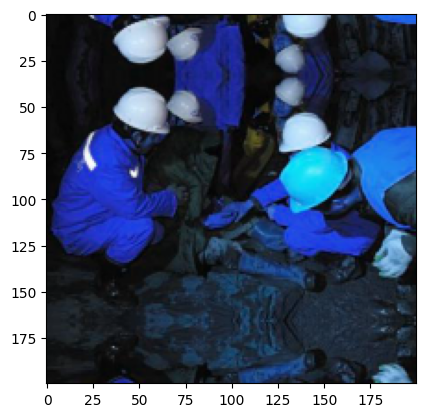

In [7]:
plt.imshow(images[4]);  #display image

**Observation:**

Image which is located at 4th index is displayed


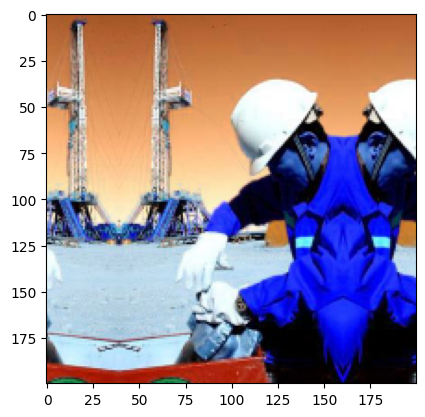

In [8]:
plt.imshow(images[10]);  #display image

**Observation:**

Image which is located at 10th index is displayed

In [9]:
def plot_images(images,labels):
    keys=dict(labels['Label'])
    rows = 3     # Defining number of rows=3
    cols = 4     # Defining number of columns=4
    fig = plt.figure(figsize=(10, 8))   # Defining the figure size to 10x8
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(labels))   # Generating random indices from the data and plotting the images
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)  # Adding subplots with 3 rows and 4 columns
            ax.imshow(images[random_index, :])    # Plotting the image
            ax.set_title(keys[random_index])  #set title
    plt.tight_layout() # Add this line
    plt.show()

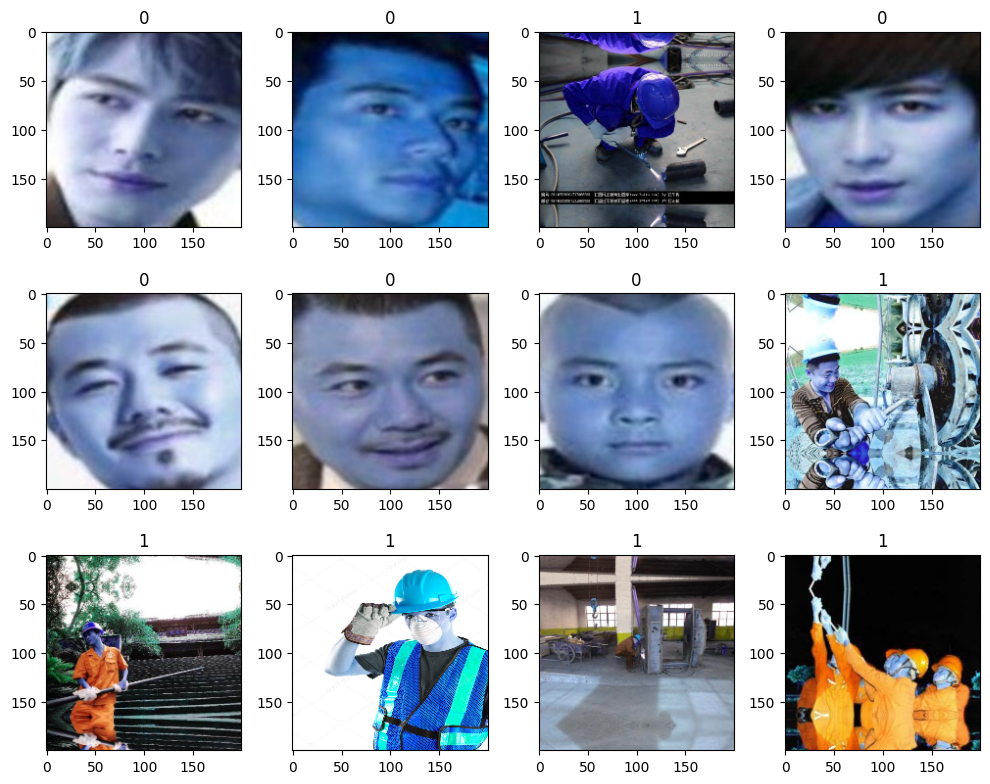

In [10]:
plot_images(images,labels)  #display image with their labels

**Observation:**

Here the image with Lable 1 shows that they are with Helmet. And where the lable is 0 shows that they are without helmet.

## Checking for class imbalance


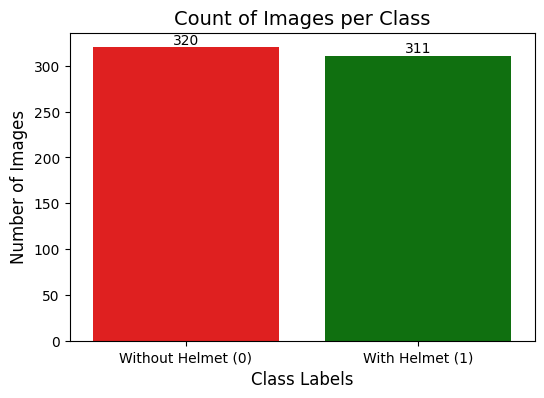

In [13]:
# Create a count plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=labels.iloc[:, 0], palette=['red', 'green'])

# Add exact counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, )

# Add labels
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Count of Images per Class", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Without Helmet (0)", "With Helmet (1)"])

# Show plot
plt.show()

**Observation:**

It shows that there are 320 such image which doesnot include any helmet . And there are 311 such image which has helmet.

# **Data Preprocessing**

## Converting images to grayscale

In [14]:
# Function to plot the original and processed images side by side
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)    #display first image in the first subplot
    axes[0].set_title('Original Image')  #set title of th first subplot to Original image
    axes[0].axis('off')  #turns off the axes labels and making the image the primary focus

    if gray:
      axes[1].imshow(img2,cmap='gray')  #if true, display second image of the second subplot using grayscale cmap
    else:
      axes[1].imshow(img2)  #if false, display second image in the second subplot using default cmap
    axes[1].set_title('Gray Image')  #set title of the second subplot to Gray image
    axes[1].axis('off')  #turns of the axis lables and ticks for the second subplots.

    plt.show()  #display image

In [15]:
#Function to convert an image into Gray image
gray_images = []   #store Grayscale version of the image
for i in range(len(images)):    #start loops and iterate through each images
  gray_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)   #perform actual grayscale conversion
  gray_images.append(gray_img)  #add newly created grayscale image

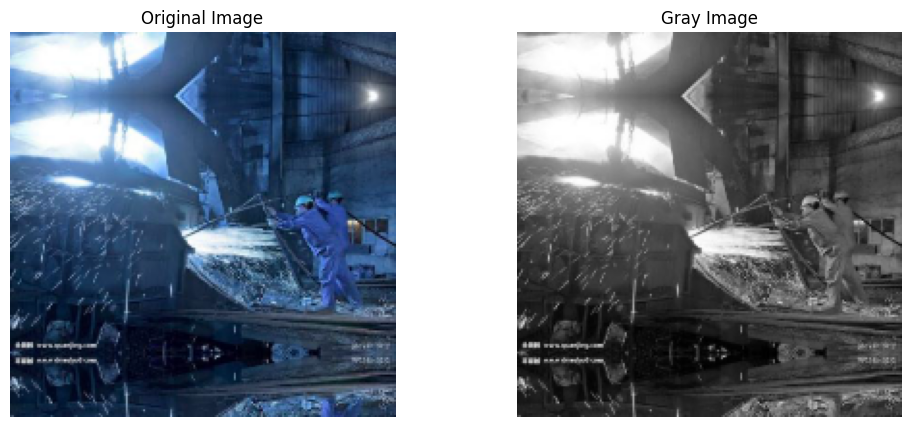

In [16]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(images[n],gray_images[n],gray=True)

**Observation:**

Image which is located at 5th index is displayed side by side one with Original color image  and the grayscale image

### Splitting the dataset



In [17]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [18]:
print(X_train.shape,y_train.shape) #print the shape of the train data
print(X_val.shape,y_val.shape) #print the shape of the validation data
print(X_test.shape,y_test.shape) #print the shape of the test data

(504, 200, 200, 3) (504, 1)
(63, 200, 200, 3) (63, 1)
(64, 200, 200, 3) (64, 1)


### Data Normalization

In [19]:
#Since the image pixel values range from 0-255. we divide all the pixel values by 255 to standardize the images to have values between 0-1.
X_train_normalized = X_train.astype('float32')/255.0 #Normalize the training images
X_val_normalized = X_val.astype('float32')/255.0  #Normalize the validation images
X_test_normalized = X_test.astype('float32')/255.0   #Normalize the test images

# **Model Building**

##Model Evaluation Criterion

Based on the problem statement, the aims is to enhance efficiency, scalability, and accuracy, which ultimately fostering a safer work environment while minimizing human error in safety oversight.

Best Choice: Accuracy
As the dataset is relatively balanced between "With Helmet" and "Without Helmet" categories, accuracy will give a better picture.

Along with Accuracy we will use precision so that it will show How many of the flagged violators are actually violators?

## Utility Functions

In [20]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [21]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [22]:
# Initializing Model
model_1 = Sequential()

# Convolutional layers
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(200,200,3))) #defining the shape of the input image
model_1.add(MaxPooling2D((4, 4), padding='same'))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same")) #the number of output channels,the kernel shape and the activation function
model_1.add(MaxPooling2D((2,2), padding='same')) #define the shape of the pooling kernel
model_1.add(Conv2D(128, (3,3), activation='relu', padding="same")) #define the number of output channels,the kernel shape and the activation function

# Flatten and Dense layers
model_1.add(Flatten())
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))  #define the number of neurons in the output layer and the activation function

# Compile with Adam Optimizer
opt = Adam(learning_rate=0.001) #define the learning rate.
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy","Precision"])

# Summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       320,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413,257 (1.58 MB)

 Trainable params: 413,257 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

The summary shows the layers in the model, Output shape of each layer, and the number of parameters in each layers. The total number of parameters in the model as well as number of trainable and non-trainable parameters.

In [23]:
history_1 = model_1.fit(
            X_train_normalized, y_train,
            epochs=20, #the number of epochs
            validation_data=(X_val_normalized,y_val),
            shuffle=True,
            batch_size=32, #batch size
            verbose=2
)

Epoch 1/20
16/16 - 11s - 690ms/step - Precision: 0.6538 - accuracy: 0.7143 - loss: 0.6448 - val_Precision: 1.0000 - val_accuracy: 0.8889 - val_loss: 0.4745
Epoch 2/20
16/16 - 1s - 36ms/step - Precision: 0.9518 - accuracy: 0.9544 - loss: 0.2994 - val_Precision: 1.0000 - val_accuracy: 0.9524 - val_loss: 0.1677
Epoch 3/20
16/16 - 0s - 31ms/step - Precision: 0.9465 - accuracy: 0.9385 - loss: 0.2321 - val_Precision: 1.0000 - val_accuracy: 0.8095 - val_loss: 0.6202
Epoch 4/20
16/16 - 1s - 40ms/step - Precision: 0.9717 - accuracy: 0.9702 - loss: 0.1155 - val_Precision: 1.0000 - val_accuracy: 0.9841 - val_loss: 0.0625
Epoch 5/20
16/16 - 0s - 29ms/step - Precision: 0.9879 - accuracy: 0.9881 - loss: 0.0796 - val_Precision: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 6/20
16/16 - 1s - 38ms/step - Precision: 0.9918 - accuracy: 0.9861 - loss: 0.0619 - val_Precision: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 7/20
16/16 - 0s - 28ms/step - Precision: 0.9959 - accuracy: 0.9921 -

Observation:

history_1 variables stores information about the training and validation data at each epochs.

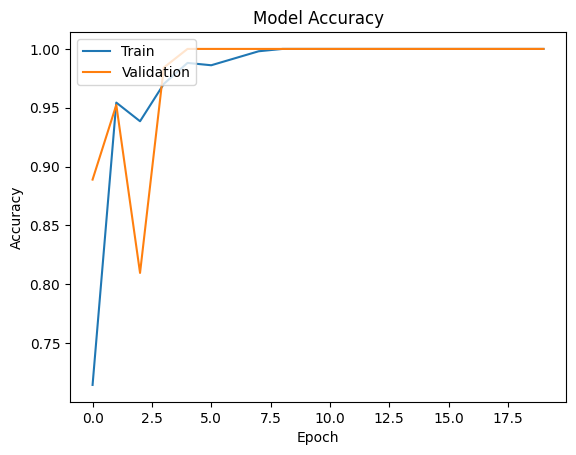

In [24]:
plt.plot(history_1.history['accuracy']) #display training accuracy
plt.plot(history_1.history['val_accuracy']) #display validation accuracy
plt.title('Model Accuracy') #Set title
plt.ylabel('Accuracy') #Set label for the y-axis
plt.xlabel('Epoch') #Set label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left')  #Add legend to plot
plt.show() #display the plot

In [25]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train)  #calculates performance classification metrics for training data

print("Train performance metrics")
print(model_1_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


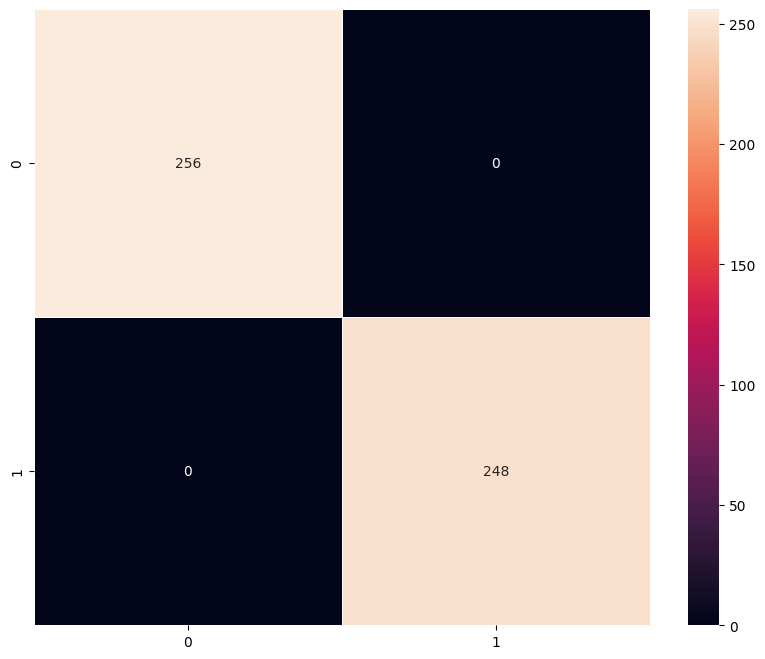

In [27]:
plot_confusion_matrix(model_1,X_train_normalized,y_train)  #display confusion matrix for training data

In [28]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val) #calculates performance classification metrics for validation data

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


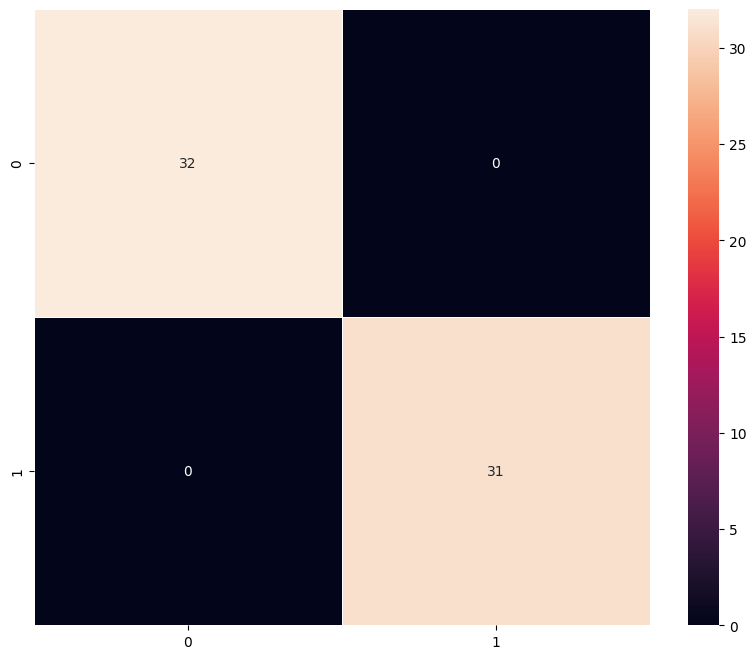

In [29]:
plot_confusion_matrix(model_1,X_val_normalized,y_val)  #display confusion matrix for validation data

**Observation:**

The model has achieved 100% accuracy on the training set and 100% accuracy on the validation set.Its seems like model is the perfect model.

### Vizualizing the predictions

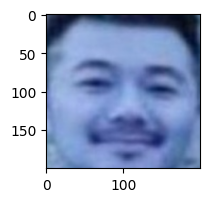

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted Label: 0
True Label: Label    0
Name: 314, dtype: int64


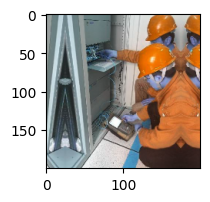

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: 1
True Label: Label    1
Name: 59, dtype: int64


In [95]:
# For index 4
plt.figure(figsize=(2,2))  #create a new figure
plt.imshow(X_val[4]) #display the image located at index 4
plt.show()   #dispaly the image
prediction = model_1.predict(X_val_normalized[4].reshape(1,200,200,3))  #use trained model to make prediction
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[4]  #retrive actual true label for the image
print('True Label:', true_label)

# For index 10
plt.figure(figsize=(2,2))  #create a new figure
plt.imshow(X_val[10])  #display the image located at index 10
plt.show()  #dispaly the image
prediction = model_1.predict(X_val_normalized[10].reshape(1,200,200,3))  #use trained model to make prediction
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[10]  #retrive actual true label for the image
print('True Label:', true_label)

**Observation:**

For both image Predicted label and true label is matching.

## Model 2: (VGG-16 (Base))

We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset.

For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer (output).

In [31]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(200,200,3)) #Creates an instance of the VGG16 model from the keras module.
vgg_model.summary()   #print summary of the vgg model architecture.

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**Observation:**

Summary of the vgg_model includes list of layers, output shape and number of parameters in each layers. The total number of parameters in the model as well as number of trainable and non-trainable parameters.


In [32]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [33]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model
model_2.add(vgg_model)

# Flattening the output of the VGG16 model
model_2.add(Flatten())

# Adding a dense output layer
model_2.add(Dense(1, activation='sigmoid'))

opt=Adam(learning_rate=0.001) #defining the learning rate
# Compile model
model_2.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [34]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        18,433 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,121 (56.20 MB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Observtaion:**

Summary of the vgg_model includes list of layers, output shape and number of parameters in each layers. The total number of parameters in the model as well as number of trainable and non-trainable parameters.

In [35]:
train_datagen = ImageDataGenerator()  #creates an instance of ImageDataGenerator.

In [36]:
# Epochs
epochs = 20
# Batch size
batch_size = 128

history_2 = model_2.fit(train_datagen.flow(X_train_normalized,y_train,
                                      batch_size=batch_size,
                                      seed=42,
                                      shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 103s 36s/step - accuracy: 0.6064 - loss: 0.6708 - val_accuracy: 1.0000 - val_loss: 0.2192
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 1.0000 - loss: 0.2163 - val_accuracy: 0.9841 - val_loss: 0.1888
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 599ms/step - accuracy: 0.9740 - loss: 0.1407 - val_accuracy: 1.0000 - val_loss: 0.0630
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 1.0000 - loss: 0.0606 - val_accuracy: 1.0000 - val_loss: 0.0397
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 1.0000 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 591ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9844 - loss: 0.0258 - val_accuracy: 1.0000 - val_loss:

**Observation:**

history_2 stores both the training and validation data at each epochs.



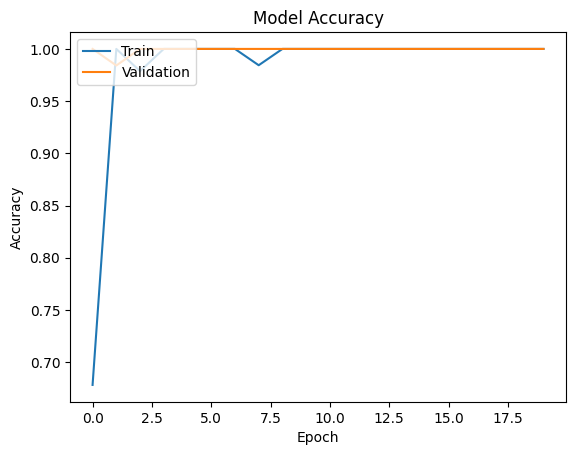

In [37]:
plt.plot(history_2.history['accuracy']) #Display training accuracy
plt.plot(history_2.history['val_accuracy']) #Display validation accuracy
plt.title('Model Accuracy') #Set title for the plot
plt.ylabel('Accuracy') #Set label for the y-axis
plt.xlabel('Epoch') #Set label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left') #Add legend
plt.show() #display the plot

In [38]:
model_2_train_perf = model_performance_classification(model_2,X_train_normalized,y_train) #calculates performance  metrics for training data

print("Train performance metrics")
print(model_2_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 733ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step


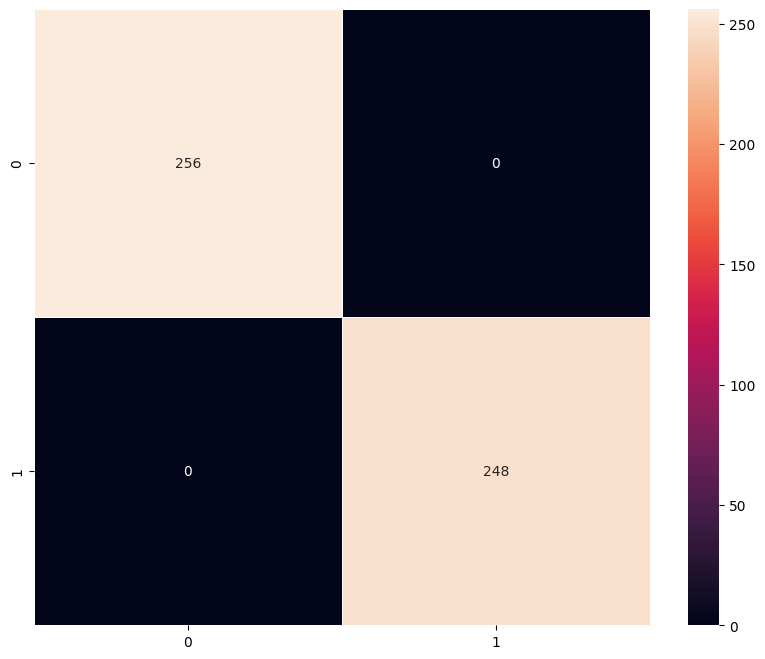

In [39]:
plot_confusion_matrix(model_2,X_train_normalized,y_train) #display confusion matrix for training data

In [40]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val)  #calculates performance metrics for validataion data

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


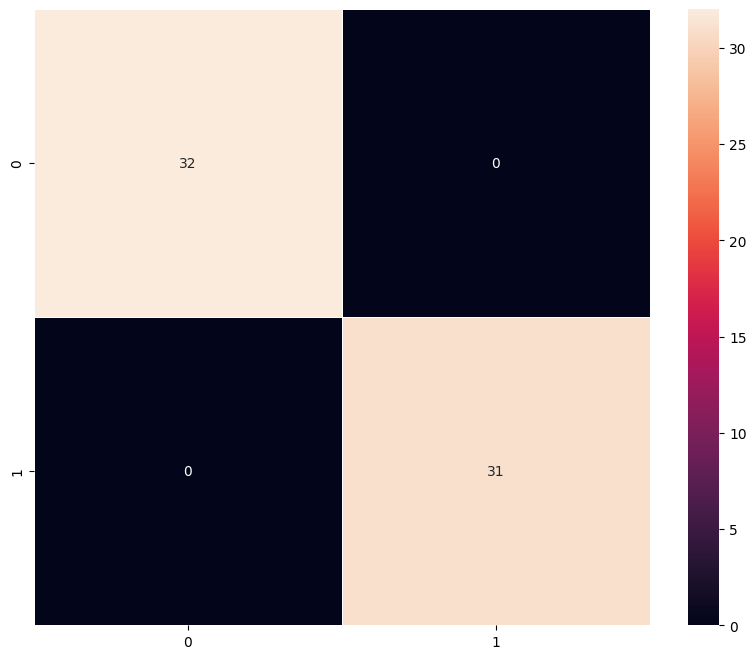

In [41]:
plot_confusion_matrix(model_2,X_val_normalized,y_val) #display validation confusion matrix

**Observation:**

The model has achieved 100% accuracy on the training set and 100% accuracy on the validation set.Its seems like model is the perfect model.

### Visualizing the prediction:

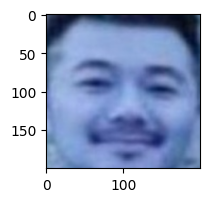

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Label: 0
True Label: Label    0
Name: 314, dtype: int64


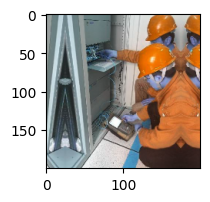

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Label: 1
True Label: Label    1
Name: 59, dtype: int64


In [96]:
plt.figure(figsize=(2,2))  #create a new figure
plt.imshow(X_val[4]) #display the image located at index 4
plt.show()  #dispaly the image
prediction = model_2.predict(X_val_normalized[4].reshape(1,200,200,3)) #use trained model to make prediction
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[4] #retrive actual true label for the image
print('True Label:', true_label)

plt.figure(figsize=(2,2))  #create a new figure
plt.imshow(X_val[10]) #display the image located at index 10
plt.show() #dispaly the image
prediction = model_2.predict(X_val_normalized[10].reshape(1,200,200,3))  #use trained model to make prediction
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[10] #retrive actual true label for the image
print('True Label:', true_label)

**Observation:**

For both image Predicted label and true label is matching.

## Model 3: (VGG-16 (Base + FFNN))

In [43]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model
model_3.add(vgg_model)

# Flattening the output of the VGG16 model
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(1, activation='sigmoid'))

In [44]:
opt=Adam() #creates an instance of Adam optimizer
# Compile model
model_3.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,441,793 (74.16 MB)

 Trainable params: 4,727,105 (18.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Observtaion:**

Summary of the vgg_model includes list of layers, output shape and number of parameters in each layers. The total number of parameters in the model as well as number of trainable and non-trainable parameters.

In [46]:
history_3 = model_3.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4968 - loss: 1.1241 - val_accuracy: 1.0000 - val_loss: 0.1780
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.8594 - loss: 0.3199 - val_accuracy: 1.0000 - val_loss: 0.0560
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - accuracy: 0.9489 - loss: 0.1133 - val_accuracy: 1.0000 - val_loss: 0.0603
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9844 - loss: 0.0359 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 552ms/step - accuracy: 0.9977 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 6.4006e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 592ms/step - accuracy: 0.9977 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 3.0356e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.9844 - loss: 0.0278 - val_accuracy: 1.0000 - val_

**Observation:**

history_3 stores both the training and validation data at each epochs.

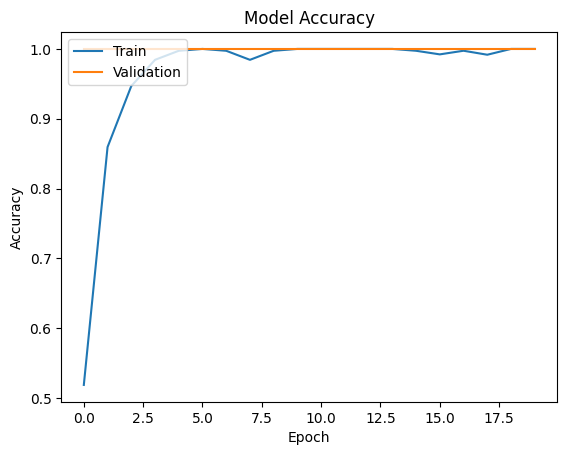

In [47]:
plt.plot(history_3.history['accuracy'])  #Display training accuracy
plt.plot(history_3.history['val_accuracy'])  #Display validation Accuracy
plt.title('Model Accuracy') #Set title
plt.ylabel('Accuracy') #set lable for y-axis
plt.xlabel('Epoch') #set label for X-axis
plt.legend(['Train', 'Validation'], loc='upper left') #Add legend
plt.show() #display the plot

In [48]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train) #calculates the performance metrics for training data

print("Train performance metrics")
print(model_3_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step


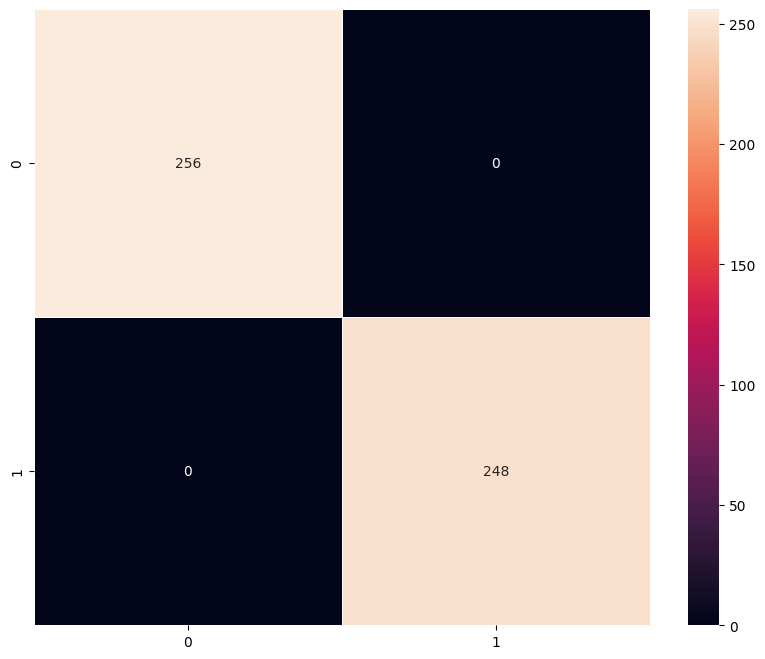

In [49]:
plot_confusion_matrix(model_3,X_train_normalized,y_train) #print confusion matrix for training data

In [50]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val)  #calculates performance metrics for validation data

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


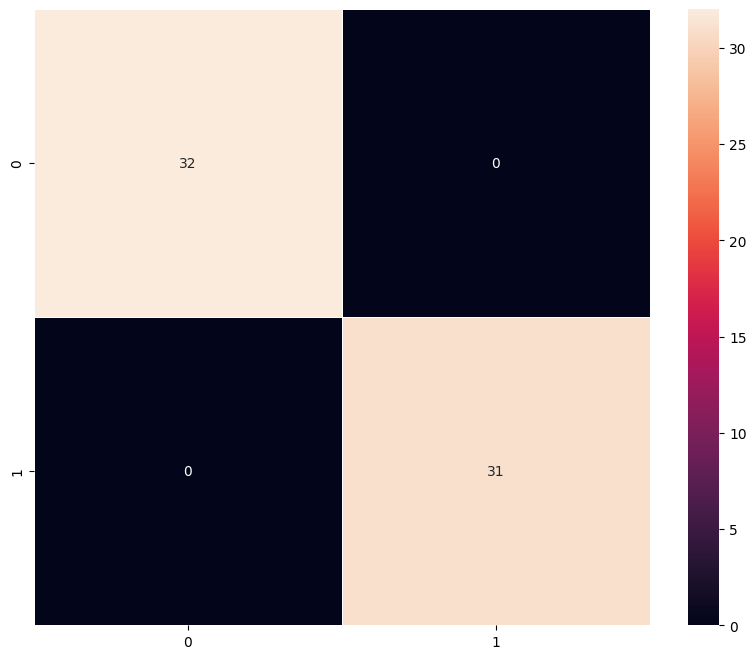

In [51]:
plot_confusion_matrix(model_3,X_val_normalized,y_val) #display confusion matrix for validation data

**Observation:**

The model has achieved 100% accuracy on the training set and 100% accuracy on the validation set.Its seems like model is the perfect model.

#### Visualizing the predictions

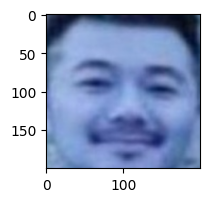

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Label: 0
True Label: Label    0
Name: 314, dtype: int64


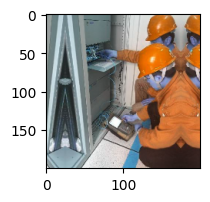

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Label: 1
True Label: Label    1
Name: 59, dtype: int64


In [97]:
plt.figure(figsize=(2,2))  #create a new figure
plt.imshow(X_val[4]) #display the image located at index 4
plt.show()  #dispaly the image
prediction = model_3.predict(X_val_normalized[4].reshape(1,200,200,3)) #use trained model to make prediction
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[4] #retrive actual true label for the image
print('True Label:', true_label)

plt.figure(figsize=(2,2))  #create a new figure
plt.imshow(X_val[10])#display the image located at index 10
plt.show()  #dispaly the image
prediction = model_3.predict(X_val_normalized[10].reshape(1,200,200,3)) #use trained model to make prediction
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[10] #retrive actual true label for the image
print('True Label:', true_label)

**Observation:**

For both image Predicted label and true label is matching.

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [75]:
model_4 = Sequential()

# Adding the convolutional part of the VGG16 model
model_4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_4.add(Flatten())

#Adding the Feed Forward neural network
model_4.add(Dense(256,activation='relu'))
model_4.add(Dropout(rate=0.4))
model_4.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_4.add(Dense(1, activation='sigmoid'))

In [76]:
opt=Adam(learning_rate=0.001)
# Compile model
model_4.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [77]:
# Generating the summary of the model
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,441,793 (74.16 MB)

 Trainable params: 4,727,105 (18.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Observtaion:**

Summary of the vgg_model includes list of layers, output shape and number of parameters in each layers. The total number of parameters in the model as well as number of trainable and non-trainable parameters.

In [78]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,   #specifes a range within which rotation is applied
                              fill_mode='nearest',  #nearest fill them with the nearest value
                              width_shift_range=0.2, #image can be shifted horizontally with 20% of its total width
                              height_shift_range=0.2, #image can be randonly shifted vertically up to 20% of their total height
                              shear_range=0.3, #skew image along axis with the value of 0.3
                              zoom_range=0.4 #image can be zoomed out or in
                              )

In [79]:
history_4 = model_4.fit(train_datagen.flow(X_train_normalized,y_train,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val),
                    verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4576 - loss: 1.2333 - val_accuracy: 0.4921 - val_loss: 0.5436
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.5781 - loss: 0.8217 - val_accuracy: 0.9365 - val_loss: 0.2097
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8728 - loss: 0.2945 - val_accuracy: 1.0000 - val_loss: 0.0494
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9375 - loss: 0.1511 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9578 - loss: 0.1113 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9453 - loss: 0.1215 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9825 - loss: 0.0535 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9922 - loss: 0.0206 - val_accuracy: 1.0000 - val_loss: 0.0084
Epo

**Observation:**

history_4 stores both the training and validation data at each epochs.

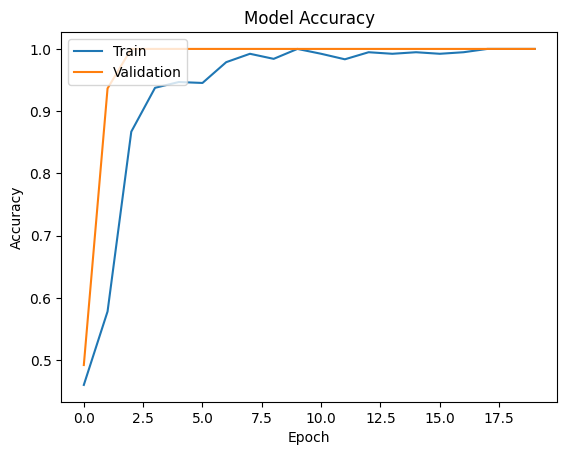

In [80]:
plt.plot(history_4.history['accuracy'])  #Display training accuracy
plt.plot(history_4.history['val_accuracy']) #display validation accuracy
plt.title('Model Accuracy') #set title
plt.ylabel('Accuracy') #set label for y-axis
plt.xlabel('Epoch') #set label for x-axis
plt.legend(['Train', 'Validation'], loc='upper left') #Add legend
plt.show() #display the plot

In [81]:
model_4_train_perf = model_performance_classification(model_4, X_train_normalized,y_train) #calculates performance metrics for training data

print("Train performance metrics")
print(model_4_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


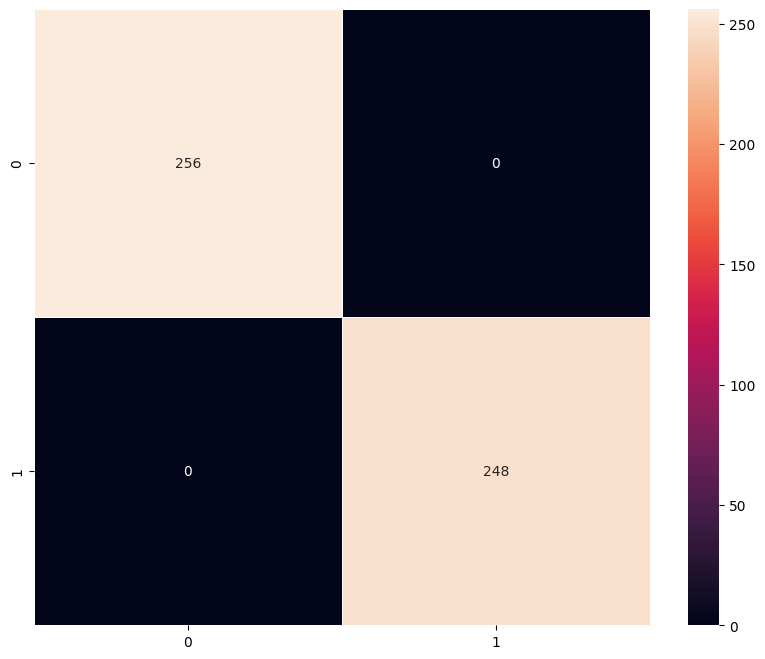

In [82]:
plot_confusion_matrix(model_4,X_train_normalized,y_train) #display confusion matrix for training data

In [83]:
model_4_valid_perf = model_performance_classification(model_4, X_val_normalized,y_val)  #calculates performace metrics for validation data

print("Validation performance metrics")
print(model_4_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 455ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


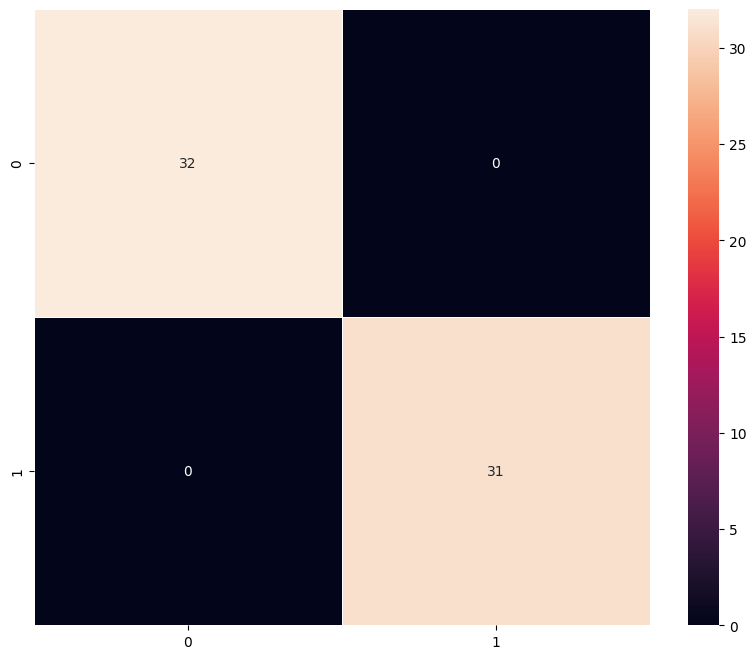

In [84]:
plot_confusion_matrix(model_4,X_val_normalized,y_val) #display confusion matrix for validation data

**Observation:**

The model has achieved 100% accuracy on the training set and 100% accuracy on the validation set.Its seems like model is the perfect model.

#### Visualizing the predictions

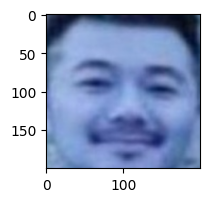

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Label: 0
True Label: Label    0
Name: 314, dtype: int64


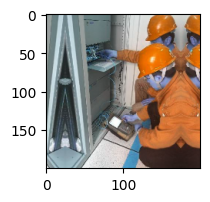

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Label: 1
True Label: Label    1
Name: 59, dtype: int64


In [98]:
plt.figure(figsize=(2,2)) #create a new figure
plt.imshow(X_val[4]) #display the image located at index 4
plt.show()  #dispaly the image
prediction = model_4.predict(X_val_normalized[4].reshape(1,200,200,3)) #use trained model to make prediction
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[4] #retrive actual true label for the image
print('True Label:', true_label)

plt.figure(figsize=(2,2))  #create a new figure
plt.imshow(X_val[10]) #display the image located at index 10
plt.show()   #dispaly the image
prediction = model_4.predict(X_val_normalized[10].reshape(1,200,200,3)) #use trained model to make prediction
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[10] #retrive actual true label for the image
print('True Label:', true_label)

**Observation:**

For both image Predicted label and true label is matching.

# **Model Performance Comparison and Final Model Selection**

In [86]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [87]:
# validation performance comparison
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [88]:
models_train_comp_df  #display metrics for each model

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0
F1 Score,1.0,1.0,1.0,1.0


In [89]:
models_valid_comp_df  #display metrics for each model

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0
F1 Score,1.0,1.0,1.0,1.0


In [90]:
models_train_comp_df - models_valid_comp_df  #calculates element wise subtraction between each dataframe and display

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.0,0.0,0.0,0.0
Recall,0.0,0.0,0.0,0.0
Precision,0.0,0.0,0.0,0.0
F1 Score,0.0,0.0,0.0,0.0


Observation:

All the model has acheived the same level of performance in the training set as well as validation set. We can choose any of the 4 model for our test data set.

I am selecting model2 (VGG-16 (Base)) as our final model.

## Test Performance

In [99]:
model_test_perf = model_performance_classification(model_2, X_test_normalized,y_test)  #calculates the performance metrics on test data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [100]:
model_test_perf  #display the metrics

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


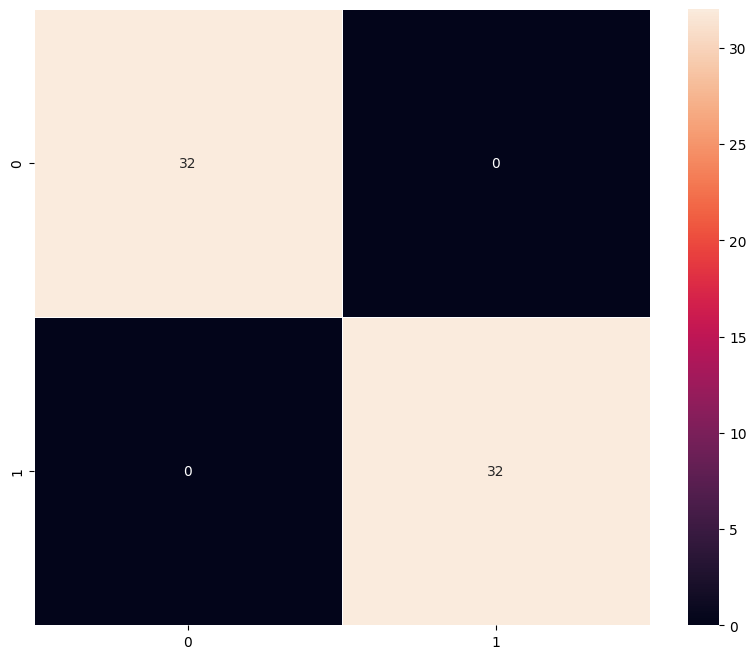

In [101]:
plot_confusion_matrix(model_2, X_test_normalized,y_test) #Display confusion matrix for test data

**Observation:**

The model has achieved 100% accuracy on the test set as well.

# **Actionable Insights & Recommendations**

**Actionable Insights**

1. Helmet Compliance Mapping:

    Analyze visual data to identify locations and time slots with consistently high helmet usage. These insights can highlight areas with effective supervision or strong safety culture, which can serve as a model for underperforming zones.

2. Non-Compliance Heat Zones:

    Detect recurring patterns of violations based on shift timings, job types, or specific work locations. These patterns can inform targeted interventions, such as enhanced signage, supervisor oversight, or schedule adjustments.

3. Contractor-Level Risk Analysis:

    Correlate helmet violations with specific contractors, subcontractors, or teams to build a safety risk profile. This enables data-driven accountability and facilitates performance-based assessments.

4. Impact Assessment of Interventions:

    Monitor changes in compliance rates after introducing real-time alerts or training campaigns. Metrics such as repeat violations and response latency can help assess the effectiveness of your safety initiatives.

Business Recommendations

1. Prioritize Real-Time Monitoring at High-Risk Locations:

    Begin system rollout at sites with high incident potential—such as zones involving overhead machinery, scaffolding, or restricted-access areas.

2. Integrate with HR and Safety Management Platforms:

    Link helmet compliance data with employee records and shift logs to support trend analysis, safety training, and predictive modeling of risk.

3. Introduce Safety Performance Indicators for Vendors:

    Establish helmet compliance KPIs for subcontractors, making adherence a component of contract renewals, bonuses, or penalties. This fosters a shared responsibility for site safety.

4. Automate Safety Reporting and Audit Readiness:

    Generate periodic compliance dashboards and downloadable reports to support internal audits and align with external regulatory requirements.

5. Install automated helmet detection at high-risk zones like machinery areas—to alert or restrict access for workers without helmets, similar to vehicle safety features that prevent operation without seatbelts or helmets.

<font size=5 color='blue'>Power Ahead!</font>
___